In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importing csv files
from google.colab import files
uploaded = files.upload()

Saving confirmed.csv to confirmed (4).csv
Saving deaths.csv to deaths (4).csv
Saving skoreaupdated.csv to skoreaupdated (4).csv
Saving USupdated.csv to USupdated.csv


## True/Reported Cases Graphs

The following function relies upon Tomas's deaths method to estimate the true number of COVID-19 cases. As inputs, it takes in

The current amount of deaths
Fatality rate
Days from infection to death
Doubling time
The function returns a list containing, in order:

The number of cases since the onset of symptoms
The number of times cases have doubled
The true number of cases today
Below is an example run using some experimental numbers.


In [ ]:
# FUNCTION FOR CALCULATING TRUE AMOUNT OF COVID-19 CASES

# Fatality rate is assumed to be in percentage form 

def calc_true_cases(current_deaths, fatality_rate, days_from_infection_to_death, doubling_time):
    past_num_cases = current_deaths / (fatality_rate/100)
    num_times_cases_doubled = days_from_infection_to_death/doubling_time
    true_num_cases = past_num_cases * 2**(num_times_cases_doubled)
    #print('Number of cases', days_from_infection_to_death , 'days ago:', past_num_cases,
          #'\nNumber of times cases have doubled:', num_times_cases_doubled,
          #'\nTrue number of cases today:', true_num_cases)
    return [past_num_cases, num_times_cases_doubled, true_num_cases]

calc_true_cases(170, 2, 20, 21)


[8500.0, 0.9523809523809523, 16448.04023490616]

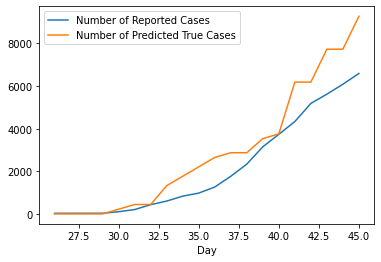

In [ ]:
# CODE FOR CALCULATING SOUTH KOREA GRAPH from 1/22/20 to present

# Filters original table of CONFIRMED/REPORTED cases into South Korea data only
confirmed_table = pd.read_csv('confirmed.csv')
filter_tbl1 = confirmed_table.drop(columns=['Lat', 'Long', 'Province/State'])
south_korea_confirmed_tbl = filter_tbl1.loc[filter_tbl1['Country/Region'] == 'Korea, South'].drop(columns=['Country/Region'])

# Filters original table of DEATH cases into South Korea data only
deaths_table = pd.read_csv('deaths.csv')
filter_tbl2 = deaths_table.drop(columns=['Lat', 'Long', 'Province/State'])
south_korea_deaths_tbl = filter_tbl2.loc[filter_tbl2['Country/Region'] == 'Korea, South'].drop(columns=['Country/Region'])

# List of CONFIRMED cases for South Korea
list_of_confirmed_cases = south_korea_confirmed_tbl.values.flatten().tolist()
list_of_confirmed_cases

# List of death cases for South Korea
list_of_death_cases = south_korea_deaths_tbl.values.flatten().tolist()
list_of_death_cases

# Predicted death over time
pred_cases = []
for death in list_of_death_cases:
  pred_cases += [calc_true_cases(death, 1.7, 21, 11)[2]]

cases_over_time = DataFrame({'Day': np.arange(1, (1 + len(list_of_death_cases))), 'Number of Reported Cases': list_of_confirmed_cases, 'Number of Predicted True Cases': pred_cases})

shorter_table = cases_over_time.iloc[25:45]
shorter_table.plot('Day')

Source for doubling time: http://theconversation.com/coronavirus-cases-are-growing-exponentially-heres-what-that-means-135181

Source for mortality rate: https://google.com/covid19-map/?hl=en

The next few steps we need to make towards the project is making sure the true cases equation makes the most sense and is more accurate since there are some variances. We also have to find more and credible sources of information that we can use to average out our morality rate, and other data to make sure they are more accurate. Here are a few links that I found that we can use:

General up-to-date tracker: https://google.com/covid19-map/?hl=en 

US: https://www.worldometers.info/coronavirus/country/us/

Italy: https://www.worldometers.info/coronavirus/country/italy/

South Korea: https://www.worldometers.info/coronavirus/country/south-korea/

(Btw, we can use more github data on death counts and just figure out morality rates there, etc...)

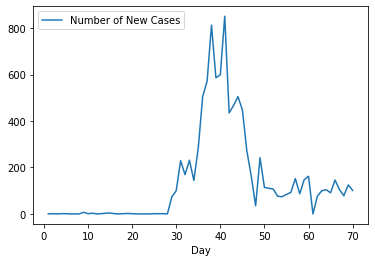

In [ ]:
# Number of new cases over time in South Korea
list_of_new_confirmed = []
arr = np.array(list_of_confirmed_cases)

for i in range(len(arr)-1):
    list_of_new_confirmed = np.append(list_of_new_confirmed, arr[i+1] - arr[i])

list_of_new_confirmed

over_time = DataFrame({'Day': np.arange(1, (1 + len(list_of_new_confirmed))), 'Number of New Cases': list_of_new_confirmed})
over_time.plot('Day')


#**South Korea Article Draft:**

South Korea most effectively contained the COVID-19 outbreak, as seen by the sharp leveling off of the number of COVID-19 cases in the country. South Korea’s quick and aggressive response to COVID-19 can be attributed to a number of factors.

#MERS
In 2015, a Korean businessman returned from the Middle East with a fever, cough, and pneumonia, and was later diagnosed with MERS, Middle East Respiratory Syndrome. It was hard for officials to try to trace his movements because they didn’t know who was infected or where the people who were infected had been. This illness killed 36 of the 186 cases in South Korea. Through MERS, South Korea learned about the importance of diagnostic tests and basic infection prevention measures. When South Korea had reported about 30 coronavirus cases, the government immediately took action and started working with biotech companies to develop a test for the virus and had thousands of kits ready to be distributed to various hospitals. By February, cases rose to rapidly rose to 3000. 

#MOVEMENT TRACING
Because of South Korea’s preparation, a woman who was tested positive had her movement traced. She went to church for an hour and officials were able to track down those who were in contact with her, many of whom tested positive soon later and were isolated. Soon after its testing measures, cases rose to about 9000. They then ramped up testing around the country by having private and national healthcare systems join forces, offering 20,000 people a day free testing for over 600 locations, a per-capita rate 40 times that from the United States. They traced positive people and their contacts on a large scale. 

#New Laws
After failing to trace MERS effectively in 2015, new laws were passed to allow the government to collect patients’ data and security footage during an outbreak. This allowed them to alert the public of where infected people have been and to avoid those areas via phone alerts and applications. Many South Korean citizens have accepted that they must sacrifice a loss of privacy in exchange for data that can be used to track the virus to keep the public safe. Also, in recent efforts to contain the COVID-19 outbreak, every traveler as of April 1 is placed in mandatory quarantine for 14 days, according to the Korea Centers for Disease Control and Prevention. Those who fail to comply with regulations may be imprisoned for up to a year or fined up to 10 million won, while foreigners risk facing deportation.



,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,...,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,...,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886,161807,188172,213372,243403.0,275457.0,308993.0,334968.0,363719.0,394156.0,424289.0,458635.0,493252.0,522843.0,576774.0,602473.0,632656.0,663260.0,728293.0,NaN,NaN,NaN,NaN


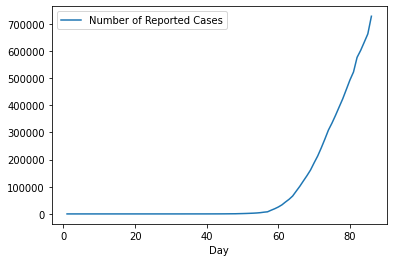

In [ ]:
confirmed_table = pd.read_csv('USupdated.csv')
filter_tbl1 = confirmed_table.drop(columns=['Lat', 'Long', 'Province/State'])
US = filter_tbl1.loc[filter_tbl1['Country/Region'] == 'US'].drop(columns=['Country/Region'])

# List of CONFIRMED cases for South Korea
list_of_US = US.values.flatten().tolist()
list_of_US


testing = DataFrame({'Day': np.arange(1, (1 + len(list_of_US))), 'Number of Reported Cases': list_of_US})
testing.plot("Day")

confirmed_table.loc[filter_tbl1['Country/Region'] == 'US']